# Numpy

In [10]:
import numpy as np
from time import time

### Zadanie 1.

Stwórz losową tablicę 10,000 liczb, następnie do każdego elementu dodaj 1. Następnie napisz dokładnie tę samą funkcję używając `numpy` i jego tablic. Porównaj czas działania swoich rozwiązań.

In [63]:
def my_timeit(func):
    def function(*args, **kwargs):
        start = time()
        result = func(*args, **kwargs)
        print('Function %s took: %s seconds' % (func.__name__, format(time() - start)))
        return result
    return function


In [64]:
import random

@my_timeit
def random_add(size):
    return list(map(lambda x: x + 1, map(lambda x: random.randint(0, 100), range(size))))


@my_timeit
def random_add_np(size):
    return np.random.randint(0, 100, size=size) + 1


random_add(10000)
random_add_np(10000)


Function random_add took: 0.020804882049560547 seconds
Function random_add_np took: 0.00037288665771484375 seconds


array([72, 21, 30, ..., 38, 11, 52])

### Zadanie 2.

Napisz funkcję obliczającą $\sin(x) + \cos(x)$ dla każdego elementu tablicy 10,000 losowych liczb używając pętli oraz używając numpy, porównaj ich szybkość podobnie jak w poprzednim zadaniu.

In [65]:
from math import sin, cos

@my_timeit
def cos_sin(size):
    return list(map(lambda x: cos(x)+sin(x), map(lambda x: random.randint(0, 100), range(size))))


@my_timeit
def cos_sin_np(size):
    subject = np.random.randint(0,100, size=size)
    return np.cos(subject) + np.sin(subject)


cos_sin(10000)
cos_sin_np(10000)

Function cos_sin took: 0.04650306701660156 seconds
Function cos_sin_np took: 0.002001047134399414 seconds


array([ 1.13858183,  1.11205278,  0.87860557, ...,  1.37622551,
       -1.37905342, -1.39267012])

### Zadanie 3.

Napisz wydajniejszą forme następujących funkcji. Porównaj szybkość wywołania oryginalnych funkcji i ich odpowiedników z numpy.

In [73]:
@my_timeit
def cube_sum(x):
    """Zwraca sume szescianow elementow"""
    result = 0
    for i in range(len(x)):
        result += x[i] ** 3
    return result


@my_timeit
def cube_sum_np(x):
    return np.sum(np.power(np.array(x), 3))


x1 = list(map(lambda x: random.randint(0, 100), range(0, 100000)))
print(cube_sum(x1))
print(cube_sum_np(x1))


@my_timeit
def almost_variance(x):
    """Oblicza 1/n * SUM (x_i - mean(x))^4"""
    m = sum(x) / len(x)
    result = 0
    for i in range(len(x)):
        result += (x[i] - m) ** 4
    result /= len(x)
    return result


@my_timeit
def almost_variance_np(x):
    as_array = np.array(x)
    mean = as_array.mean()
    return np.sum(np.power(as_array - mean, 4)) / as_array.size

print(almost_variance(x1))
print(almost_variance_np(x1))


Function cube_sum took: 0.05852699279785156 seconds
25293113188
Function cube_sum_np took: 0.02446889877319336 seconds
25293113188
Function almost_variance took: 0.05212211608886719 seconds
1291265.8342415432
Function almost_variance_np took: 0.016628026962280273 seconds
1291265.83424


### Zadanie 4.

Wykorzystujac `broadcasting` (patrz na rysunek poniżej) stwórz tabliczkę mnożenia tzn. tablice $A$ taką, że $$A_{ij} = i \cdot j\;\;\;\;\; \forall i,j \in \{1,\dots,10\}$$

Czy potrafisz wykonać to jednym poleceniem, nie używajac przy tym pętli/comprehensions?

In [83]:

def index_multiplication_table(x, y):
    return np.arange(y).reshape((y, 1)) * np.arange(x)


print(index_multiplication_table(11,11))


[[  0   0   0   0   0   0   0   0   0   0   0]
 [  0   1   2   3   4   5   6   7   8   9  10]
 [  0   2   4   6   8  10  12  14  16  18  20]
 [  0   3   6   9  12  15  18  21  24  27  30]
 [  0   4   8  12  16  20  24  28  32  36  40]
 [  0   5  10  15  20  25  30  35  40  45  50]
 [  0   6  12  18  24  30  36  42  48  54  60]
 [  0   7  14  21  28  35  42  49  56  63  70]
 [  0   8  16  24  32  40  48  56  64  72  80]
 [  0   9  18  27  36  45  54  63  72  81  90]
 [  0  10  20  30  40  50  60  70  80  90 100]]


<img src="http://www.astroml.org/_images/fig_broadcast_visual_1.png">

### Zad 5.

Wygeneruj losową tablice `10 x 5`, która będzie reprezentować `10` punktów w `5` wymiarowej przestrzeni. Napisz funkcje, która policzy odleglość euklidesową pomiędzy każdą parą punktów, czy potrafisz zrobić to **bez użycia żadnych pętli/comprehensions**? 

Przypomnienie, dla dwóch wektorów: $x$ i $y$ $$d_{e}(x,y) = \| x - y \|^2_2 = \sum_{i=1}^d (x_i - y_i)^2 $$

In [108]:
x = np.random.randint(0, 100, size=50)
y = x.reshape((50, 1))
# print((x - y))
# print(x)
# print(y)

print(np.linalg.norm(np.array([1,2,3])))


3.74165738677


### Zad 6.

Napisz funkcje do "wybielania" zbioru punktow, tj. aplikowania następującej transformacji (ponownie, zrób to bez użycia pętli etc.)
$$
\mathrm{white}(X)_{ij} = \frac{X_{ij} - \mu_j}{\sigma_j}
$$
gdzie $\mu_j$ to srednia po $j$-ej kolumnie, a $\sigma_j$ to odchylenie standardowe po tej kolumnie, np.

$$
\mathrm{whiten}\left ( \left [ \begin{matrix} 
0& 1\\
2& 3\\
4& 5\\
6& 7\\
8& 9
\end{matrix} \right ] \right ) = 
\left [ \begin{matrix} 
-1.41421356& -1.41421356\\
-0.70710678& -0.70710678\\
0.        &  0.        \\
0.70710678&  0.70710678\\
1.41421356&  1.41421356
\end{matrix} \right ]
$$

W szczególności średnia po poszczególnych kolumnach nowej macierzy powinna wynosić `0` a odchylenie standardowe `1`.

In [115]:
x = np.arange(10).reshape((5,2))
print((x - np.mean(x, axis=0)) / np.std(x, axis=0))


[[-1.41421356 -1.41421356]
 [-0.70710678 -0.70710678]
 [ 0.          0.        ]
 [ 0.70710678  0.70710678]
 [ 1.41421356  1.41421356]]


### Zad 7.

Mając daną tablice dowolnie wymiarową oraz liczbe `x` znajdź najbliższą wartość `x` w `A`, tzn. 

$$
\mathrm{closest}(x, A) = \arg\min_{a\in A}| x - a| 
$$

np. 

$$
\mathrm{closest}(1.5, [1, -4, 3]) = 1
$$

Ponownie, czy potrafisz zrobić to bez pętli, etc.?


In [136]:
y = -1.7
x = np.arange(10).reshape((5, 2))
flat = x.flatten()
flat[np.abs(flat - y).argmin()]


0

### Zad 8.

Zaimplementuj proste liczenie wartosci wielomianu o zadanych wspolczynnikach (analogie `np.poly1d`), czyli funkcje

$$
\mathrm{poly}(x, a) = a_0 + a_1 x + a_2 x^2 + \dots + a_k x^k = \sum_{i=1}^k a_i x^i
$$

Czy potrafisz zrobić to bez użycia pętli, etc. (oraz oczywiście `np.poly1d`). 
Może Ci się przydać metoda `cumprod`.

In [159]:
def poly(x, a):
    
    return np.sum(np.power(x, np.arange(len(a))) * a[::-1])

sample_a = [1, 7, -18, 5,2,3,41,9,8]
sample_x = 23
print(poly(sample_x, sample_a))
print(np.poly1d(sample_a)(sample_x))


99512917210
99512917210


## Obrazki

Do wyświetlania obrazków w notebooku potrzebny będzie `matplotlib`. W PyCharmie można użyć `imshow` z biblioteki `scipy`.

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
from scipy.misc import imread

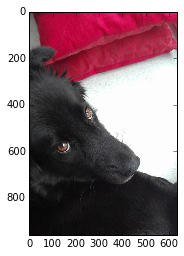

In [3]:
img = imread('lab10_files/doggo.png', mode='RGB')
plt.imshow(img)

### Zad 9.

Napisz funckje do przetwarzania obrazu do skali szarości wg wzoru:

$$ 0.2126 \times R + 0.7152 \times  G + 0.0722 \times B $$

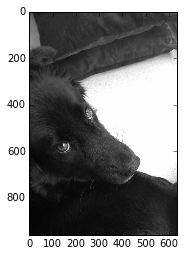

In [40]:
def to_grayscale(image):
    return np.sum(image * [0.2126, 0.7152, 0.0722], 2)

plt.imshow(to_grayscale(img), cmap='gray')

### Zad 10.

Wyłącznie za pomocą metod numpy napisz kod do interpolacji liniowej pomiędzy parą punktów (dowolnej wymiarowości) wg wzoru:

$$ x_i = \lambda x_1 + (1 - \lambda) x_2$$

Kod powinien od razu generować interpolacje dla wielu wartości $\lambda$, np dla 10 różnych $\lambda \in \{0, 0.1, 0.2, \dots, 1\}$